In [54]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

## Carga datos

In [35]:
# Ruta de salida de datos NASA POWER
OUT_DIR = Path("../../data/raw/nasa")
INDEX_PATH = OUT_DIR / "coord_index.csv"

In [36]:
# Cargar índice 
df_index = pd.read_csv(INDEX_PATH)
df_index.columns = [c.strip().lower() for c in df_index.columns]

In [37]:
df_index

,row_id,tipo_actividad,latitud,longitud,lat_r,lon_r,coord_hash
0,0,Administrativa,3.41,-76.53,3.41,-76.53,75246e90e485
1,1,Administrativa,4.62,-74.11,4.62,-74.11,a71c8bc52a66
2,2,Administrativa,4.71,-74.23,4.71,-74.23,be6b4f99fea5
3,3,Administrativa,4.81,-74.10,4.81,-74.10,ac2a0153bf6b
4,4,Administrativa,4.81,-75.72,4.81,-75.72,6a956df3c5d9
...,...,...,...,...,...,...,...
385,385,Producción,10.90,-74.88,10.90,-74.88,c35a5af557e6
386,386,Producción,10.91,-74.79,10.91,-74.79,f482b38c33e4
387,387,Producción,10.98,-74.82,10.98,-74.82,a0137c350549
388,388,Producción,11.23,-74.19,11.23,-74.19,8521e6fdb4ca


In [38]:
# Leer CSV por coordenada
files = sorted(OUT_DIR.glob("nasa_power/*_nasa_power.csv"))

In [39]:
# Apilar todos los CSV y agregar columna coord_hash

dfs = []
for fp in files:
    coord_hash = fp.name.replace("_nasa_power.csv", "")
    d = pd.read_csv(fp)
    d["coord_hash"] = coord_hash
    d["date"] = pd.to_datetime(d["date"], errors="coerce")
    dfs.append(d)

df_daily = pd.concat(dfs, ignore_index=True)

In [40]:
df_daily

,date,T2M,RH2M,ALLSKY_SFC_SW_DWN,PRECTOTCORR,WS2M,EVLAND,coord_hash
0,2016-01-01,13.34,89.56,16.81,0.45,1.93,2.87,0185cdf9e600
1,2016-01-02,12.80,87.09,13.06,0.22,1.56,2.68,0185cdf9e600
2,2016-01-03,13.48,86.72,19.24,0.26,1.38,3.23,0185cdf9e600
3,2016-01-04,13.85,88.94,15.30,0.45,1.12,2.62,0185cdf9e600
4,2016-01-05,14.16,88.67,16.14,0.72,0.96,2.22,0185cdf9e600
...,...,...,...,...,...,...,...,...
306847,2025-12-27,19.41,81.34,NaN,0.01,0.86,4.40,f59338cd354c
306848,2025-12-28,19.67,72.34,NaN,0.01,1.06,4.68,f59338cd354c
306849,2025-12-29,20.17,78.18,NaN,0.41,0.87,3.58,f59338cd354c
306850,2025-12-30,21.00,74.94,NaN,1.29,0.81,4.01,f59338cd354c


## Revisión calidad

In [41]:
df_daily

,date,T2M,RH2M,ALLSKY_SFC_SW_DWN,PRECTOTCORR,WS2M,EVLAND,coord_hash
0,2016-01-01,13.34,89.56,16.81,0.45,1.93,2.87,0185cdf9e600
1,2016-01-02,12.80,87.09,13.06,0.22,1.56,2.68,0185cdf9e600
2,2016-01-03,13.48,86.72,19.24,0.26,1.38,3.23,0185cdf9e600
3,2016-01-04,13.85,88.94,15.30,0.45,1.12,2.62,0185cdf9e600
4,2016-01-05,14.16,88.67,16.14,0.72,0.96,2.22,0185cdf9e600
...,...,...,...,...,...,...,...,...
306847,2025-12-27,19.41,81.34,NaN,0.01,0.86,4.40,f59338cd354c
306848,2025-12-28,19.67,72.34,NaN,0.01,1.06,4.68,f59338cd354c
306849,2025-12-29,20.17,78.18,NaN,0.41,0.87,3.58,f59338cd354c
306850,2025-12-30,21.00,74.94,NaN,1.29,0.81,4.01,f59338cd354c


In [42]:
df_daily.describe()

,date,T2M,RH2M,ALLSKY_SFC_SW_DWN,PRECTOTCORR,WS2M,EVLAND
count,306852,306852.000000,306852.000000,301728.000000,306852.000000,306852.000000,303199.000000
mean,2020-12-30 23:59:59.999999744,19.188454,83.522547,16.961272,4.755057,1.276732,3.139086
min,2016-01-01 00:00:00,9.440000,38.180000,1.390000,0.000000,0.040000,0.000000
25%,2018-07-02 00:00:00,16.190000,79.900000,14.640000,0.490000,0.400000,2.360000
50%,2020-12-31 00:00:00,17.970000,84.840000,16.760000,2.280000,0.860000,3.140000
75%,2023-07-02 00:00:00,20.760000,88.430000,19.310000,6.280000,1.540000,3.950000
max,2025-12-31 00:00:00,32.990000,98.500000,27.610000,296.280000,13.520000,8.180000
std,NaN,4.394062,6.995737,3.482511,7.380641,1.346313,1.148798


In [43]:
# Identificar última fecha con datos completos en variables climáticas
# Se eliminan para tener un conjunto de datos consistente y evitar sesgos en análisis posteriores

vars_clima = [
    "T2M",
    "RH2M",
    "ALLSKY_SFC_SW_DWN",
    "PRECTOTCORR",
    "WS2M",
    "EVLAND"
]

df_daily_clean = df_daily.dropna(subset=vars_clima, how="any")

print("Antes:", df_daily.shape)
print("Después:", df_daily_clean.shape)

display(df_daily_clean.describe())

Antes: (306852, 8)
Después: (298136, 8)


,date,T2M,RH2M,ALLSKY_SFC_SW_DWN,PRECTOTCORR,WS2M,EVLAND
count,298136,298136.000000,298136.000000,298136.000000,298136.000000,298136.000000,298136.000000
mean,2020-11-30 12:00:00,19.086829,83.505753,16.929386,4.795576,1.226751,3.141775
min,2016-01-01 00:00:00,9.440000,38.180000,1.480000,0.000000,0.040000,0.000000
25%,2018-06-16 18:00:00,16.180000,79.880000,14.630000,0.490000,0.400000,2.360000
50%,2020-11-30 12:00:00,17.930000,84.870000,16.730000,2.290000,0.860000,3.150000
75%,2023-05-17 06:00:00,20.610000,88.420000,19.240000,6.350000,1.500000,3.950000
max,2025-10-31 00:00:00,32.990000,98.500000,27.550000,296.280000,10.000000,8.180000
std,NaN,4.310665,7.025359,3.448735,7.440990,1.258525,1.151976


In [44]:
# Análisis de días disponibles por coordenada en el rango de 10 años
# Debería ser cercano a 3650 (10 años * 365 días)

days_by_coord = (
    df_daily_clean
    .groupby("coord_hash")["date"]
    .count()
    .describe()
)

days_by_coord

count      83.0
mean     3592.0
std         0.0
min      3592.0
25%      3592.0
50%      3592.0
75%      3592.0
max      3592.0
Name: date, dtype: float64

### Análisis variables climatológicas

* Se tiene data desde 01-2016 hasta 10-2025, teniendo un arango cercano a una década. Suficiente para construir un histórico climatológico
* La temperatura tiene un rango de 9 a 33 °C, lo cual es coherente para el sector geog´rafico analizado (Colombia)
* Se eliminaron todas las filas en donde alguna variable no tubiera datos, esto con el propósito de tener un conjunto de datos consistente y evitar inconsistencias en futuros análisis. Las variables con datos faltantes son ALLSKY_SFC_SW_DWN y EVLAND; sin embargo, se mantiene un conjunto con gran cantidad de registros. 
* Se validó el número de entradas por coordenada, dando en total 3592 entradas para cada variable. Con esto se tiene un database balanceado y con cantidad de datos cercano a lo esperado (3650).

In [45]:
df_daily_clean.to_csv("../../data/transformed/nasa/nasa_power_cleaned.csv", index=False)

## Transformación

In [46]:
df = df_daily_clean.copy()
df["date"] = pd.to_datetime(df["date"])

In [47]:
df.describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

,date,T2M,RH2M,ALLSKY_SFC_SW_DWN,PRECTOTCORR,WS2M,EVLAND
count,298136,298136.000000,298136.000000,298136.000000,298136.000000,298136.000000,298136.000000
mean,2020-11-30 12:00:00,19.086829,83.505753,16.929386,4.795576,1.226751,3.141775
min,2016-01-01 00:00:00,9.440000,38.180000,1.480000,0.000000,0.040000,0.000000
25%,2018-06-16 18:00:00,16.180000,79.880000,14.630000,0.490000,0.400000,2.360000
50%,2020-11-30 12:00:00,17.930000,84.870000,16.730000,2.290000,0.860000,3.150000
75%,2023-05-17 06:00:00,20.610000,88.420000,19.240000,6.350000,1.500000,3.950000
95%,2025-05-05 00:00:00,28.370000,92.420000,22.880000,17.520000,4.130000,5.000000
99%,2025-09-26 00:00:00,29.380000,94.720000,24.670000,31.370000,6.116500,5.610000
max,2025-10-31 00:00:00,32.990000,98.500000,27.550000,296.280000,10.000000,8.180000
std,NaN,4.310665,7.025359,3.448735,7.440990,1.258525,1.151976


In [55]:
df.columns

Index(['date', 'T2M', 'RH2M', 'ALLSKY_SFC_SW_DWN', 'PRECTOTCORR', 'WS2M',
       'EVLAND', 'coord_hash'],
      dtype='object')

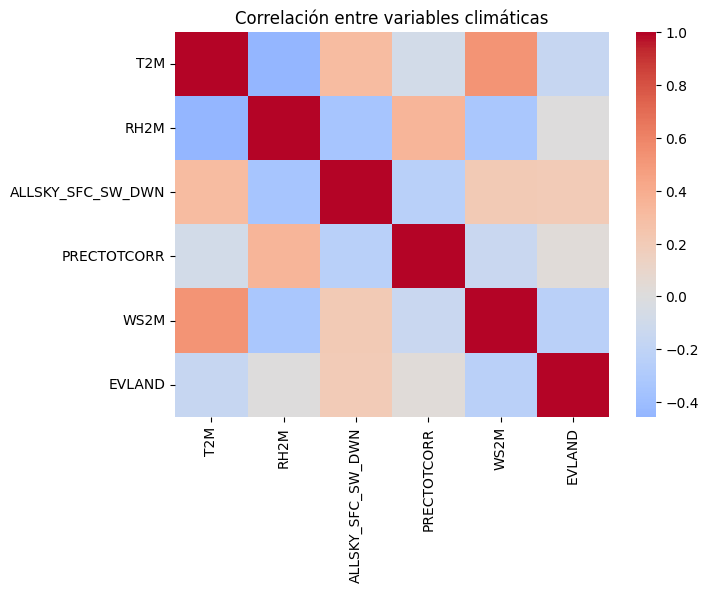

In [59]:
# Matriz de correlación entre variables climáticas
corr = df[['T2M', 'RH2M', 'ALLSKY_SFC_SW_DWN', 'PRECTOTCORR', 'WS2M',
       'EVLAND'
]].corr()

# Visualización de la matriz de correlación
plt.figure(figsize=(7,5))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlación entre variables climáticas")
plt.show()


In [ ]:
# Cálculo de features por coordenada

features = []

# Agrupar por coordenada y calcular variables para entrada a modelo
# Teniendo como base que los productos químicos son más sensibles a condiciones extremas 
# Temperatura alta puede catalizar reacciones no deseadas
# Humedad relativa alta puede favorecer crecimiento de moho o corrosión
# Radiación solar alta puede degradar materiales plásticos o recubrimientos
# Precipitación alta puede causar daños por agua o corrosión
# Dias de sequía prolongada pueden afectar procesos de almacenamiento que requieren humedad
# Viento fuerte puede causar daños físicos o dispersión de contaminantes
# Evapotranspiración alta puede indicar condiciones secas que afectan almacenamiento

for coord, g in df.groupby("coord_hash"):
    row = {"coord_hash": coord}

    # Temperatura
    t = g["T2M"].dropna()
    row["t2m_mean"] = t.mean() # Temperatura media
    row["t2m_p95"]  = t.quantile(0.95) # Temperatura alta
    row["t2m_p99"]  = t.quantile(0.99) # Temperatura extrma
    
    # Humedad relativa (RH2M)
    rh = g["RH2M"].dropna()
    row["rh2m_mean"] = rh.mean() # Humedad relativa media
    row["rh2m_p95"]  = rh.quantile(0.95) # Humedad relativa alta
    row["rh2m_p99"]  = rh.quantile(0.99) # Humedad relativa extrema

    # Radiación
    r = g["ALLSKY_SFC_SW_DWN"].dropna()
    row["rad_mean"] = r.mean() # Radiación solar media
    row["rad_p95"]  = r.quantile(0.95) # Radiación solar alta
    row["rad_p99"]  = r.quantile(0.99) # Radiación solar extrema
    
    # Precipitación
    pr = g["PRECTOTCORR"].dropna() 
    row["prec_mean"] = pr.mean() # Precipitación media
    row["prec_p95"]  = pr.quantile(0.95) # Evento severo
    row["prec_p99"]  = pr.quantile(0.99) # Evento extremo
    row["prec_days_gt_18"] = (pr > 18).sum() # Número de días con precipitación > 18 mm (percentil 95)
    row["prec_days_gt_31"] = (pr > 31).sum() # Número de días con precipitación > 31 mm (percentil 99)

    # Sequías (días secos consecutivos)
    dry = (g["PRECTOTCORR"].fillna(0) < 0.5).astype(int) # Número de días secos (precipitación < 0.5 mm) (percentil 25)
    row["dry_spell_max"] = dry.groupby((dry != dry.shift()).cumsum()).sum().max() # Máximo número de días secos consecutivos

    # Viento
    w = g["WS2M"].dropna()
    row["ws_p95"] = w.quantile(0.95) # Viento fuerte
    row["ws_p99"] = w.quantile(0.99) # Viento extremo
    row["ws_days_gt_4"] = (w > 4).sum() # Número de días con viento > 4 m/s (percentil 95)
    row["ws_days_gt_6"] = (w > 6).sum() # Número de días con viento > 6 m/s (percentil 99)
    
    # Evapotranspiración (EVLAND)
    ev = g["EVLAND"].dropna()
    row["evland_mean"] = ev.mean() # Evapotranspiración media
    row["evland_p95"]  = ev.quantile(0.95) # Evapotranspiración alta
    row["evland_p99"]  = ev.quantile(0.99) # Evapotranspiración extrema

    features.append(row)

# DataFrame final de features por coordenada
df_climate_features = pd.DataFrame(features)

In [49]:
df_climate_features.describe()

,t2m_mean,t2m_p95,t2m_p99,t2m_range,rh2m_mean,rh2m_p95,rh2m_p99,rad_mean,rad_p95,rad_p99,...,prec_days_gt_18,prec_days_gt_31,dry_spell_max,ws_p95,ws_p99,ws_days_gt_4,ws_days_gt_6,evland_mean,evland_p95,evland_p99
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,...,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,19.086829,20.692910,21.578999,6.426265,83.505753,90.829807,92.726731,16.929386,21.933741,23.759548,...,168.578313,37.433735,34.807229,2.063608,2.461377,190.000000,40.156627,3.141775,4.733735,5.205535
std,4.232381,4.346748,4.334178,1.251455,4.624849,3.105033,2.781508,1.410519,1.711475,1.571186,...,74.796981,26.963025,31.733055,1.794835,2.051404,548.308307,145.855967,0.539324,0.561515,0.567913
min,13.286954,14.750000,15.320900,5.010000,62.127631,79.074500,85.840000,14.738082,18.463500,20.613500,...,45.000000,8.000000,7.000000,0.190000,0.210000,0.000000,0.000000,1.712255,3.594500,3.980000
25%,16.423332,17.850000,18.570900,5.410000,79.358970,88.239500,90.580900,15.552170,21.354500,23.582600,...,115.000000,16.000000,15.000000,0.590000,0.660000,0.000000,0.000000,2.805100,4.500000,4.880000
50%,18.017753,19.610000,20.620000,5.990000,84.940301,91.580000,93.183600,16.807403,22.019000,24.090900,...,157.000000,34.000000,21.000000,1.774500,2.130900,0.000000,0.000000,3.226091,4.740000,5.150000
75%,20.520780,22.616750,23.734500,7.210000,87.561044,93.800000,95.230000,17.697712,23.194500,24.972700,...,184.000000,48.000000,42.000000,2.820000,3.690000,18.500000,0.000000,3.386907,5.130000,5.552700
max,28.450253,30.410000,31.288100,11.280000,89.276712,95.344500,96.460900,20.851695,24.850000,25.531800,...,499.000000,194.000000,191.000000,7.450000,8.490900,1918.000000,738.000000,4.259090,5.964500,6.590900


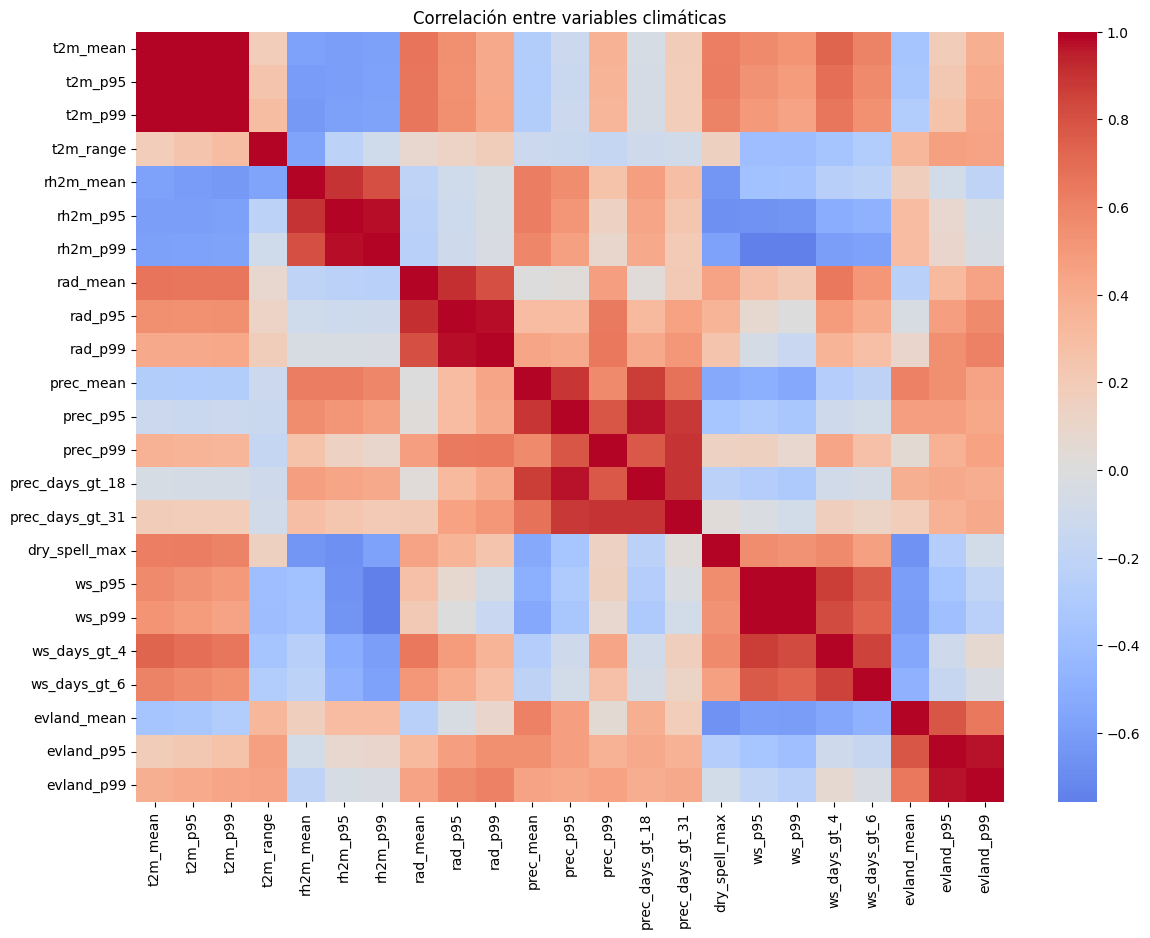

In [ ]:
corr = df_climate_features[[
    't2m_mean', 't2m_p95', 't2m_p99',
    'rh2m_mean', 'rh2m_p95', 'rh2m_p99', 'rad_mean', 'rad_p95', 'rad_p99',
    'prec_mean', 'prec_p95', 'prec_p99', 'prec_days_gt_18',
    'prec_days_gt_31', 'dry_spell_max', 'ws_p95', 'ws_p99', 'ws_days_gt_4',
    'ws_days_gt_6', 'evland_mean', 'evland_p95', 'evland_p99'
]].corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlación entre variables climáticas")
plt.show()


In [76]:
df_climate_features_2 = df_climate_features[['coord_hash', 't2m_mean', 'rh2m_mean',
                                           'rad_mean', 'rad_p95', 'prec_mean',
                                           'prec_days_gt_18', 'dry_spell_max', 'ws_p95',
                                           'ws_days_gt_6', 'evland_mean', 'evland_p95'
                                           ]]

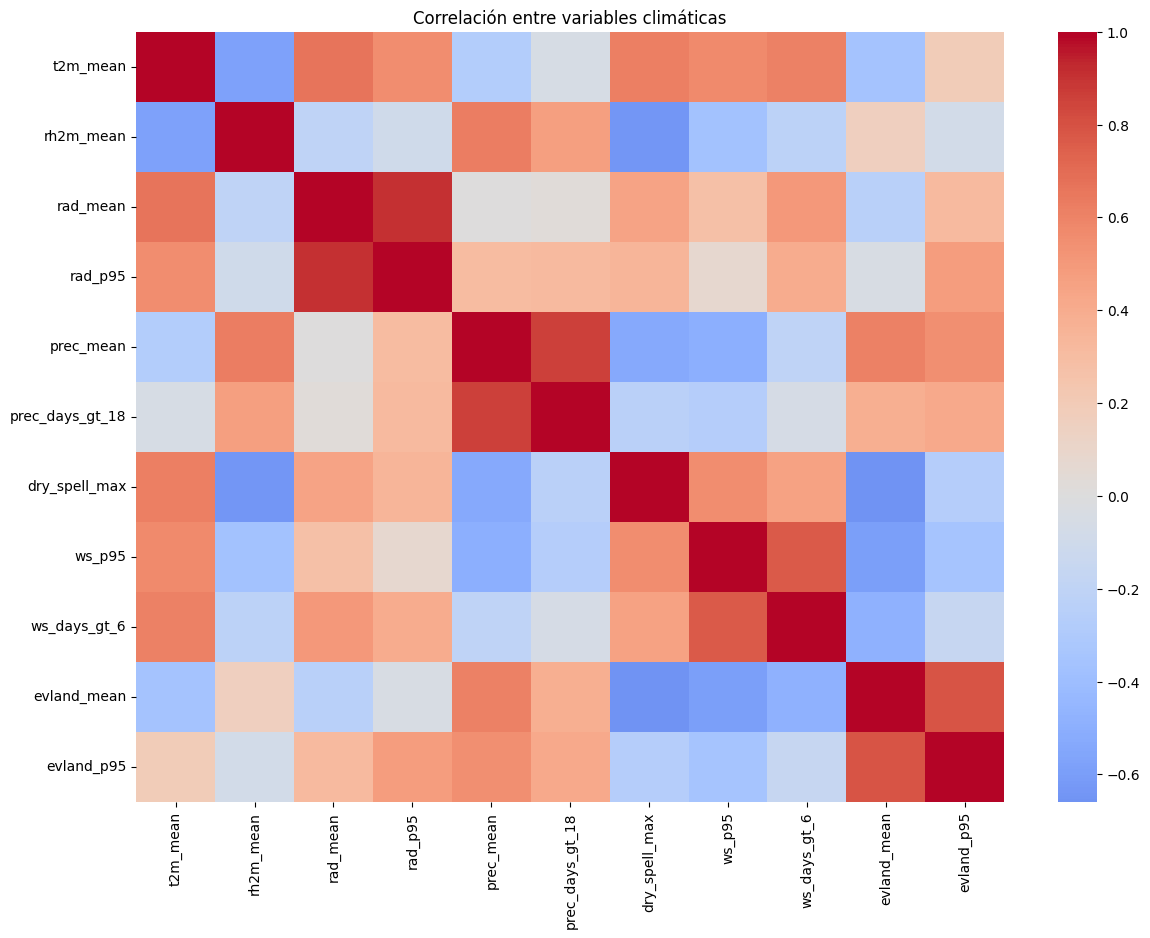

In [77]:
corr = df_climate_features_2[[
    't2m_mean', 'rh2m_mean', 'rad_mean',
       'rad_p95', 'prec_mean', 'prec_days_gt_18', 'dry_spell_max',
       'ws_p95', 'ws_days_gt_6', 'evland_mean', 'evland_p95'
]].corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlación entre variables climáticas")
plt.show()


In [79]:
df_climate_features.to_csv("../../data/processed/nasa/nasa_power_processed.csv", index=False)